# <p style="background-color:#3496f9; font-family:Georgia ; color:#f1a73a; font-size:150%; text-align:center;  border-radius:10% / 100%;">Bank</p>

<img src="bank3.jpg" alt="Bank" style="width:50%; border-radius: 50px;  display: block; margin-left: auto; margin-right: auto;" >

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">1) درباره مجموعه داده</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  این مجموعه داده در مورد یک کسب و کار است. هر سطر یک مشتری را نشان می‌دهد و هر ستون یک ویژگی از آن مشتریست. ستون y هم هدف مورد نظر است.

* هدف این طبقه بندی پیش بینی این است که آیا مشتری بر اساس ویژگی های ارائه شده اشتراک ("yes") یا عدم اشتراک ("no") سپرده مدت دار می شود. این پیش‌بینی برای بانک بسیار مهم است تا استراتژی‌های بازاریابی خود را تنظیم کند و بر مشتریانی با احتمال بالاتر اشتراک تمرکز کند. با استفاده از الگوریتم‌های یادگیری ماشین در این مجموعه داده، بانک قصد دارد کمپین‌های بازاریابی خود را بهینه کند و اشتراک سپرده بلندمدت خود را بهبود بخشد.

</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">2) فراخوانی کتابخانه‌های مورد نیاز</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">3) خواندن مجموعه داده</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  ابتدا مجموعه داده را با استفاده از کتابخانه pandas می‌خوانیم:

</div>

In [2]:
# Read dataset
df = pd.read_csv('bank.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
# Display a concise summary of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


          
# <h1 dir='rtl' style= "margin-right: 20px ;  color:#3496f9">4) مشخصات مجموعه داده </h1>
<!DOCTYPE html>
<html>
<head>
<style>
  table {
      width: 90%;
      border-collapse: collapse;
      background-color:#124559;
      margin-left: 50px;
  }
  th, td {
      border: 1px solid;
      background-color:#124559;
      border: 1px solid #ddd;
      padding: 8px;
      text-align: center;
      word-wrap: break-word;
      color:#eff6e0;
      font-size:110%
  }
</style>
</head>
<body>

<table dir='rtl'>
  <tr>
    <th>ردیف</th>
    <th>متغیر</th>
    <th>توضیحات</th>
  </tr>
  <tr>
    <td>1</td>
    <td>age</td>
    <td> سن مشتری که به صورت عددی است. </td>
  </tr>
  <tr>
    <td>2</td>
    <td>job</td>
    <td> نوع شغل </td>
  </tr>
  <tr>
    <td>3</td>
    <td>marital</td>
    <td>وضعیت تاًهل</td>
  </tr>
  <tr>
    <td>4</td>
    <td>education</td>
    <td>تحصیلات</td>
  </tr>
  <tr>
    <td>5</td>
    <td>default</td>
    <td>داشتن اعتبار پیش فرض</td>
  </tr>
  <tr>
    <td>6</td>
    <td>balance</td>
    <td>میانگین حساب سالانه مشتری  به صورت عددی ثبت شده است.</td>
  </tr>
  <tr>
    <td>7</td>
    <td>housing</td>
    <td>مشتری وام مسکن دارد؟</td>
  </tr>
  <tr>
    <td>8</td>
    <td>loan</td>
    <td>مشتری وام شخصی دارد؟</td>
  </tr>
  <tr>
    <td>9</td>
    <td>contact</td>
    <td>نوع ارتباط  تماس با مشتری (تلفن یا تلفن همراه)</td>
  </tr>
  <tr>
    <td>10</td>
    <td>day</td>
    <td>اخرین روز تماس با مشتری به صورت روزهای ماه از 1 الی 31</td>
  </tr>
  <tr>
    <td>11</td>
    <td>month</td>
    <td>اخرین ماه تماس با مشتری از سال</td>
  </tr>
  <tr>
    <td>12</td>
    <td>duration</td>
    <td>مدت زمان اخرین تماس بر حسب ثانیه.</td>
  </tr>
  <tr>
    <td>13</td>
    <td>campaign</td>
    <td>تعداد مخاطبین انجام شده در طول این کمپین و برای این مشتری (عددی، شامل آخرین تماس)</td>
  </tr>
  <tr>
    <td>14</td>
    <td>pdays</td>
    <td>تعداد روزهایی که پس از آخرین تماس با مشتری از کمپین قبلی گذشته است (عددی؛ -1 به این معنی است که قبلاً با مشتری تماس گرفته نشده است)</td>
  </tr>
  <tr>
    <td>15</td>
    <td>previous</td>
    <td>تعداد مخاطبین انجام شده قبل از این کمپین و برای این مشتری</td>
  </tr>
  <tr>
    <td>16</td>
    <td>poutcome</td>
    <td>نتیجه کمپین بازاریابی قبلی (دسته بندی: "شکست"، "عدم وجود"، "موفقیت")</td>
  </tr>
  <tr>
    <td>17</td>
    <td>y</td>
    <td>آیا مشتری سپرده مدت دار بانک ثبت کرده است؟</td>
  </tr>
</table>

</body>
</html>


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به طور خلاصه 17 تا ستون و 45211 سطر در مجموعه داده وجود دارد که هر سطر بیانگر یک مشتری است.

* 17 ویژگی مختلف وجود دارد که 7 تا از آنها نوع عددی 'int' و 10 ویژگی رشته‌ای از نوع 'object' است.

</div>

In [4]:
print("Is NA?")
print(df.isna().sum())

Is NA?
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [5]:
print("Null values in the dataset: ",df.isnull().sum().sum())

print("Duplicates in the dataset: ", df.duplicated().sum())

Null values in the dataset:  0
Duplicates in the dataset:  0


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* به نظر می‌آید در مجموعه داده هیچ مقدار تهی و صفر وجود ندارد

</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">5) پیش پردازش</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  

</div>

In [6]:
print(f'Rows            : {df.shape[0]}')
print(f'Columns         : {df.shape[1]}')
print(f'Features        : {df.columns.tolist()}')
print(f'Missing Values  : {df.isnull().values.sum()}')
print(f'Unique Values   : \n{df.nunique()}')

Rows            : 45211
Columns         : 17
Features        : ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Missing Values  : 0
Unique Values   : 
age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  با توجه به مقادیر یکتای به دست آمده مشخص میشود که ویژگی های زیر دارای دسته بندی باشند. در این مجموعه داده با توجه به اطلاعات مشتریان در قالب 31 روز و 12 ماه ثبت شده است.

</div>

In [7]:
categoricals = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','poutcome', 'y']
for i in categoricals:
    print(f'{i}: ', df[i].unique())
    print('_'*50, end='\n\n')

job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
__________________________________________________

marital:  ['married' 'single' 'divorced']
__________________________________________________

education:  ['tertiary' 'secondary' 'unknown' 'primary']
__________________________________________________

default:  ['no' 'yes']
__________________________________________________

housing:  ['yes' 'no']
__________________________________________________

loan:  ['no' 'yes']
__________________________________________________

contact:  ['unknown' 'cellular' 'telephone']
__________________________________________________

poutcome:  ['unknown' 'failure' 'other' 'success']
__________________________________________________

y:  ['no' 'yes']
__________________________________________________



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  هر یک از ویژگی‌ها دسته بندی های مختلفی وجود دارد که به ترتیب نوع و تعداد آنها نمایش داده شده است.

*  ویژگی های که به صورت yes و no هستند را می‌توان به bool صفر و یک تغییر داد.

</div>

In [8]:
# Get the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [9]:
# Get the summary statistics for categorical variables
df.describe(include='object').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


____

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">6) تحلیل اکتشافی داده‌ها (EDA)</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

</div>

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64
----------------------------------------


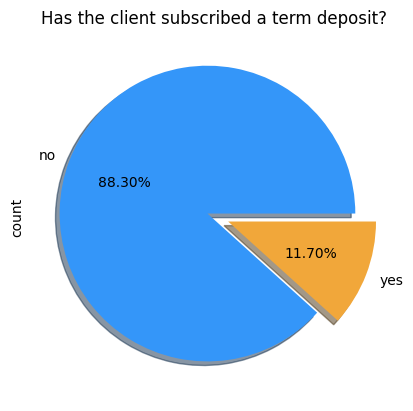

In [10]:
print(df['y'].value_counts(normalize=True)*100, end=f"\n{'-'*40}\n")
explode = (0.05, 0.1)
ax = df["y"].value_counts().plot(kind="pie", autopct = "%.2f%%", colors=["#3496f9", "#f1a73a"], shadow=True, explode=explode)
ax.set_title('Has the client subscribed a term deposit?')
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  یا حدود 12% از مشتریان اشتراک سپرده بلند مدت دار بانک را ثبت کردند.

</div>

In [11]:
cat_cols = df.select_dtypes(include="object").columns.to_list()
cat_cols.remove('y')

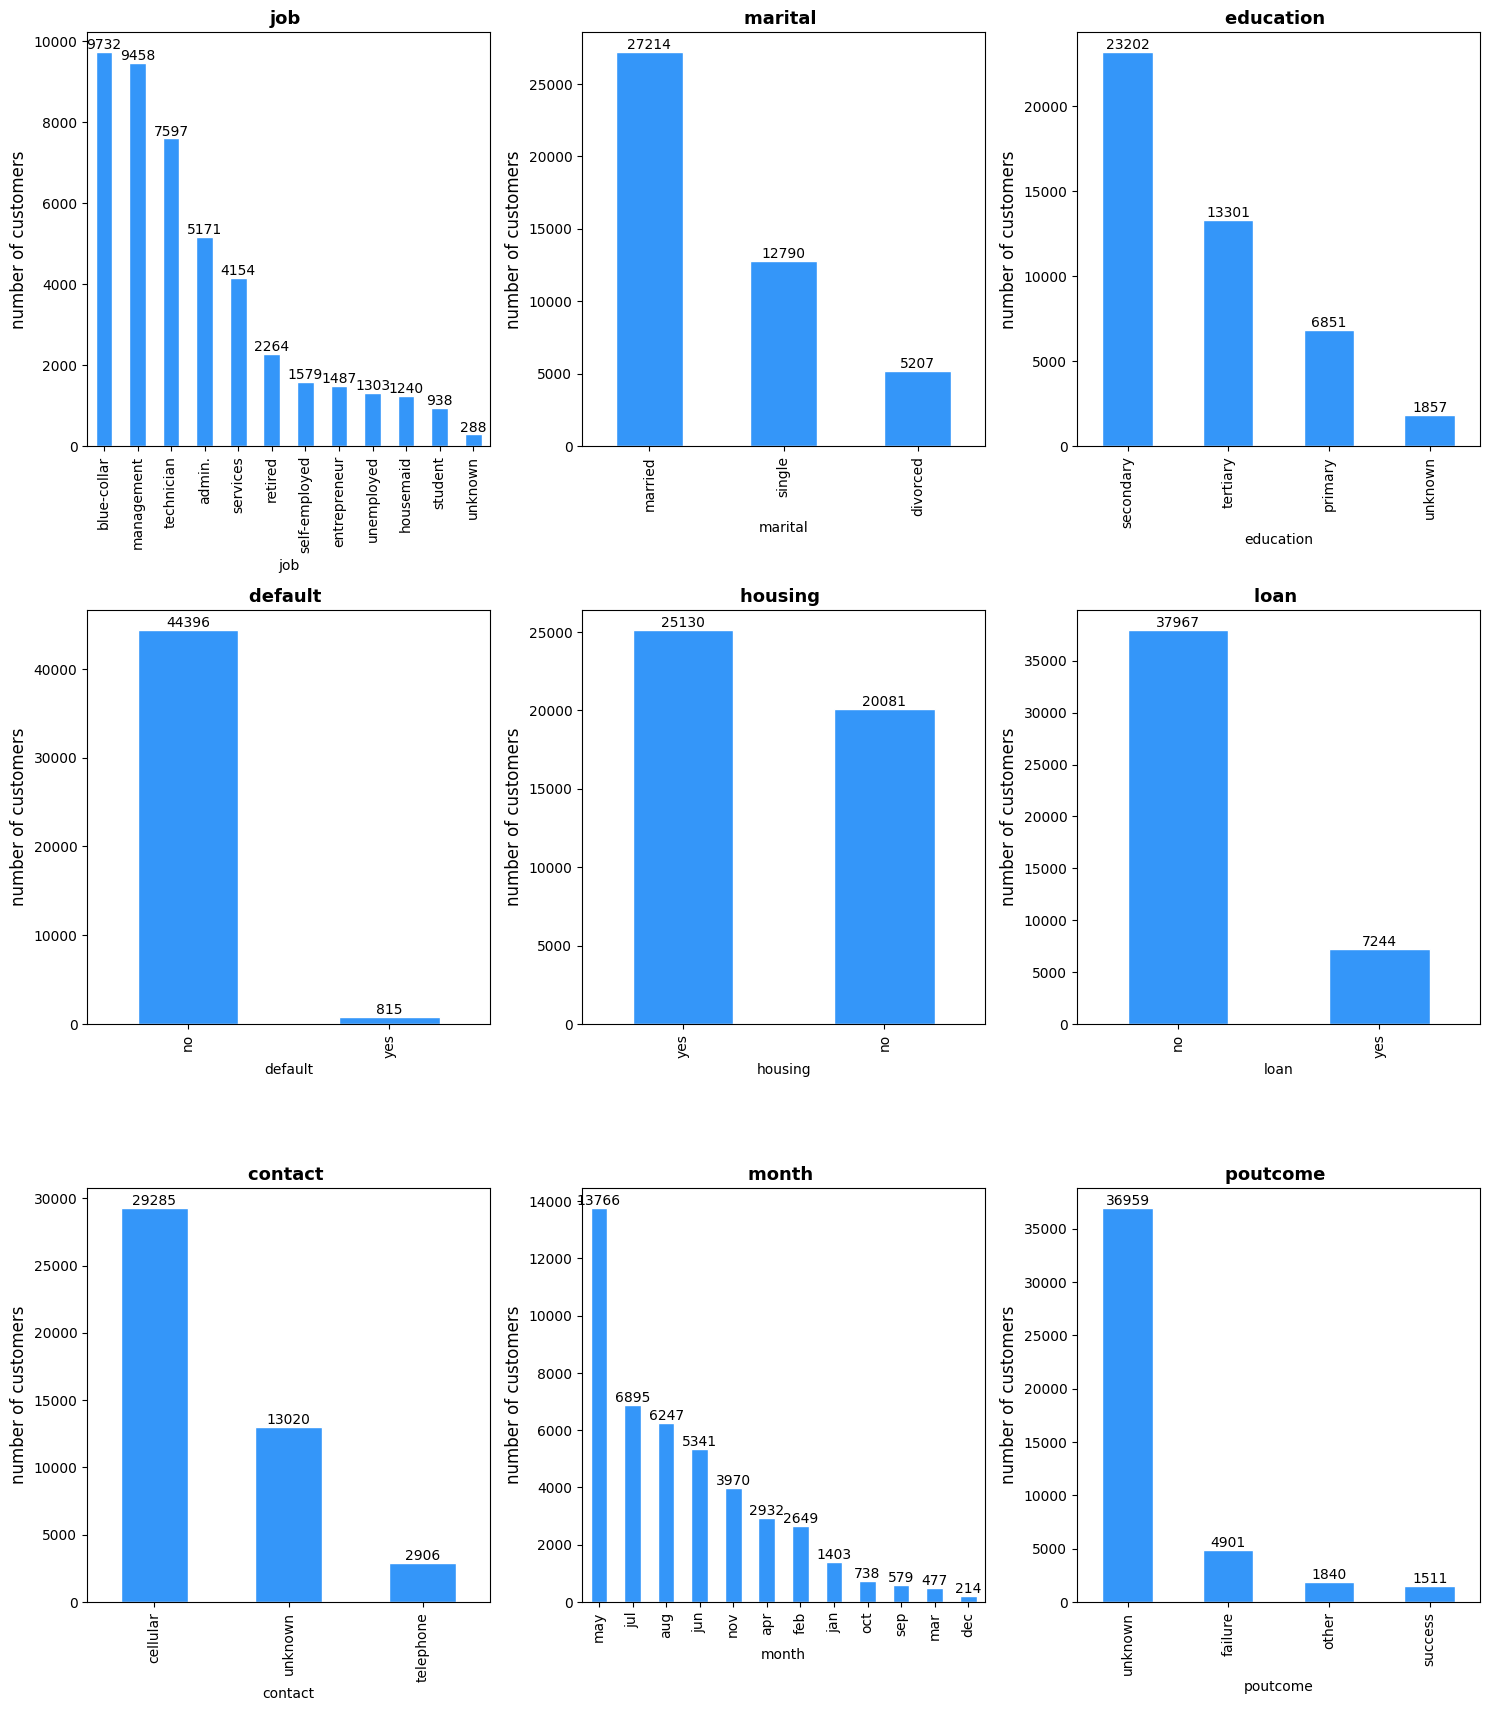

In [12]:
plt.figure(figsize=(15,22))
for i, cols in enumerate(cat_cols):
   plt.subplot(4 ,3, i+1)
   counts = df[cols].value_counts()
   counts.plot(kind='bar', color='#3496f9', edgecolor='white')

   # Add text annotation for frequencies with rotation and larger font size
   for i, v in enumerate(counts):
      plt.text(i, v, str(v), fontsize=10, ha='center', va='bottom', rotation=0)
   plt.title(f"{cols} ",fontsize=13, fontweight="black")
   plt.xticks(rotation=90)
   plt.ylabel("number of customers", fontsize=12)

plt.tight_layout()
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* `job: `طبق نمودار نمایش داده شده شغل مشتری‌های ثبت شده دارای 12 نوع منحصر به فرد است. اکثر مشتریان در بانک مشاغل management و blue-collar می باشند.

* `marital: ` اکثریت مشتری‌های بانک متاهل هستند.

* `education: ` تحصیلات بیشتر مشتری‌های بانک دارای سطح متوسطه هستند و اکثرا با سواد هستند.

* `default: ` بیشتر مشتری‌های بانک به صورت پیش فرض هیچ اعتبار قبلی در حساب خود نداشتند.

* `housing: ` تقریبا 50% مشتری‌ها وام  مسکن داشتند که کمی بیشتر از مشتری‌هایی است که وام مسکن ندارند.

* `loan: ` بیشتر مشتری ها هیچ وام شخصی قبلی نداشتند.

*  سه ویژگی فوق (اعتبار پیش‌فرض، وام مسکن، وام شخصی) بسیار مهم به نظر می‌رسند و می‌توانند بیشتر به ویژگی «y» وابسته باشند، یعنی مشتری سرمایه‌گذاری می‌کند یا خیر.


* `contact: ` به نظر می رسد تلفن های همراه محبوب ترین روش برای ارتباط با مشتریان است.

* `month: ` بیشترین تماس با مشتریان در ماه may بوده.

* `poutcome: ` نتیجه کمپین قبلی نامشخص اما با توجه به مشخص شده‌ها تعداد شکست بیشتر بوده

* این ویژگی نشان می دهد که آیا قبلاً در مورد سرمایه گذاری با مشتری تماس گرفته شده است یا خیر. بسیار مشهود است که با اکثر مشتریان حتی تماسی گرفته نمی شود زیرا طرح مقادیر بالای "عدم وجود" را نشان می دهد. میزان موفقیت کمپین های بازاریابی قبلی بسیار پایین است

</div>

In [13]:
# Assuming num_cols is a list of numerical column names from your DataFrame df
num_cols =df.select_dtypes(include=["int64"] ).columns
num_cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

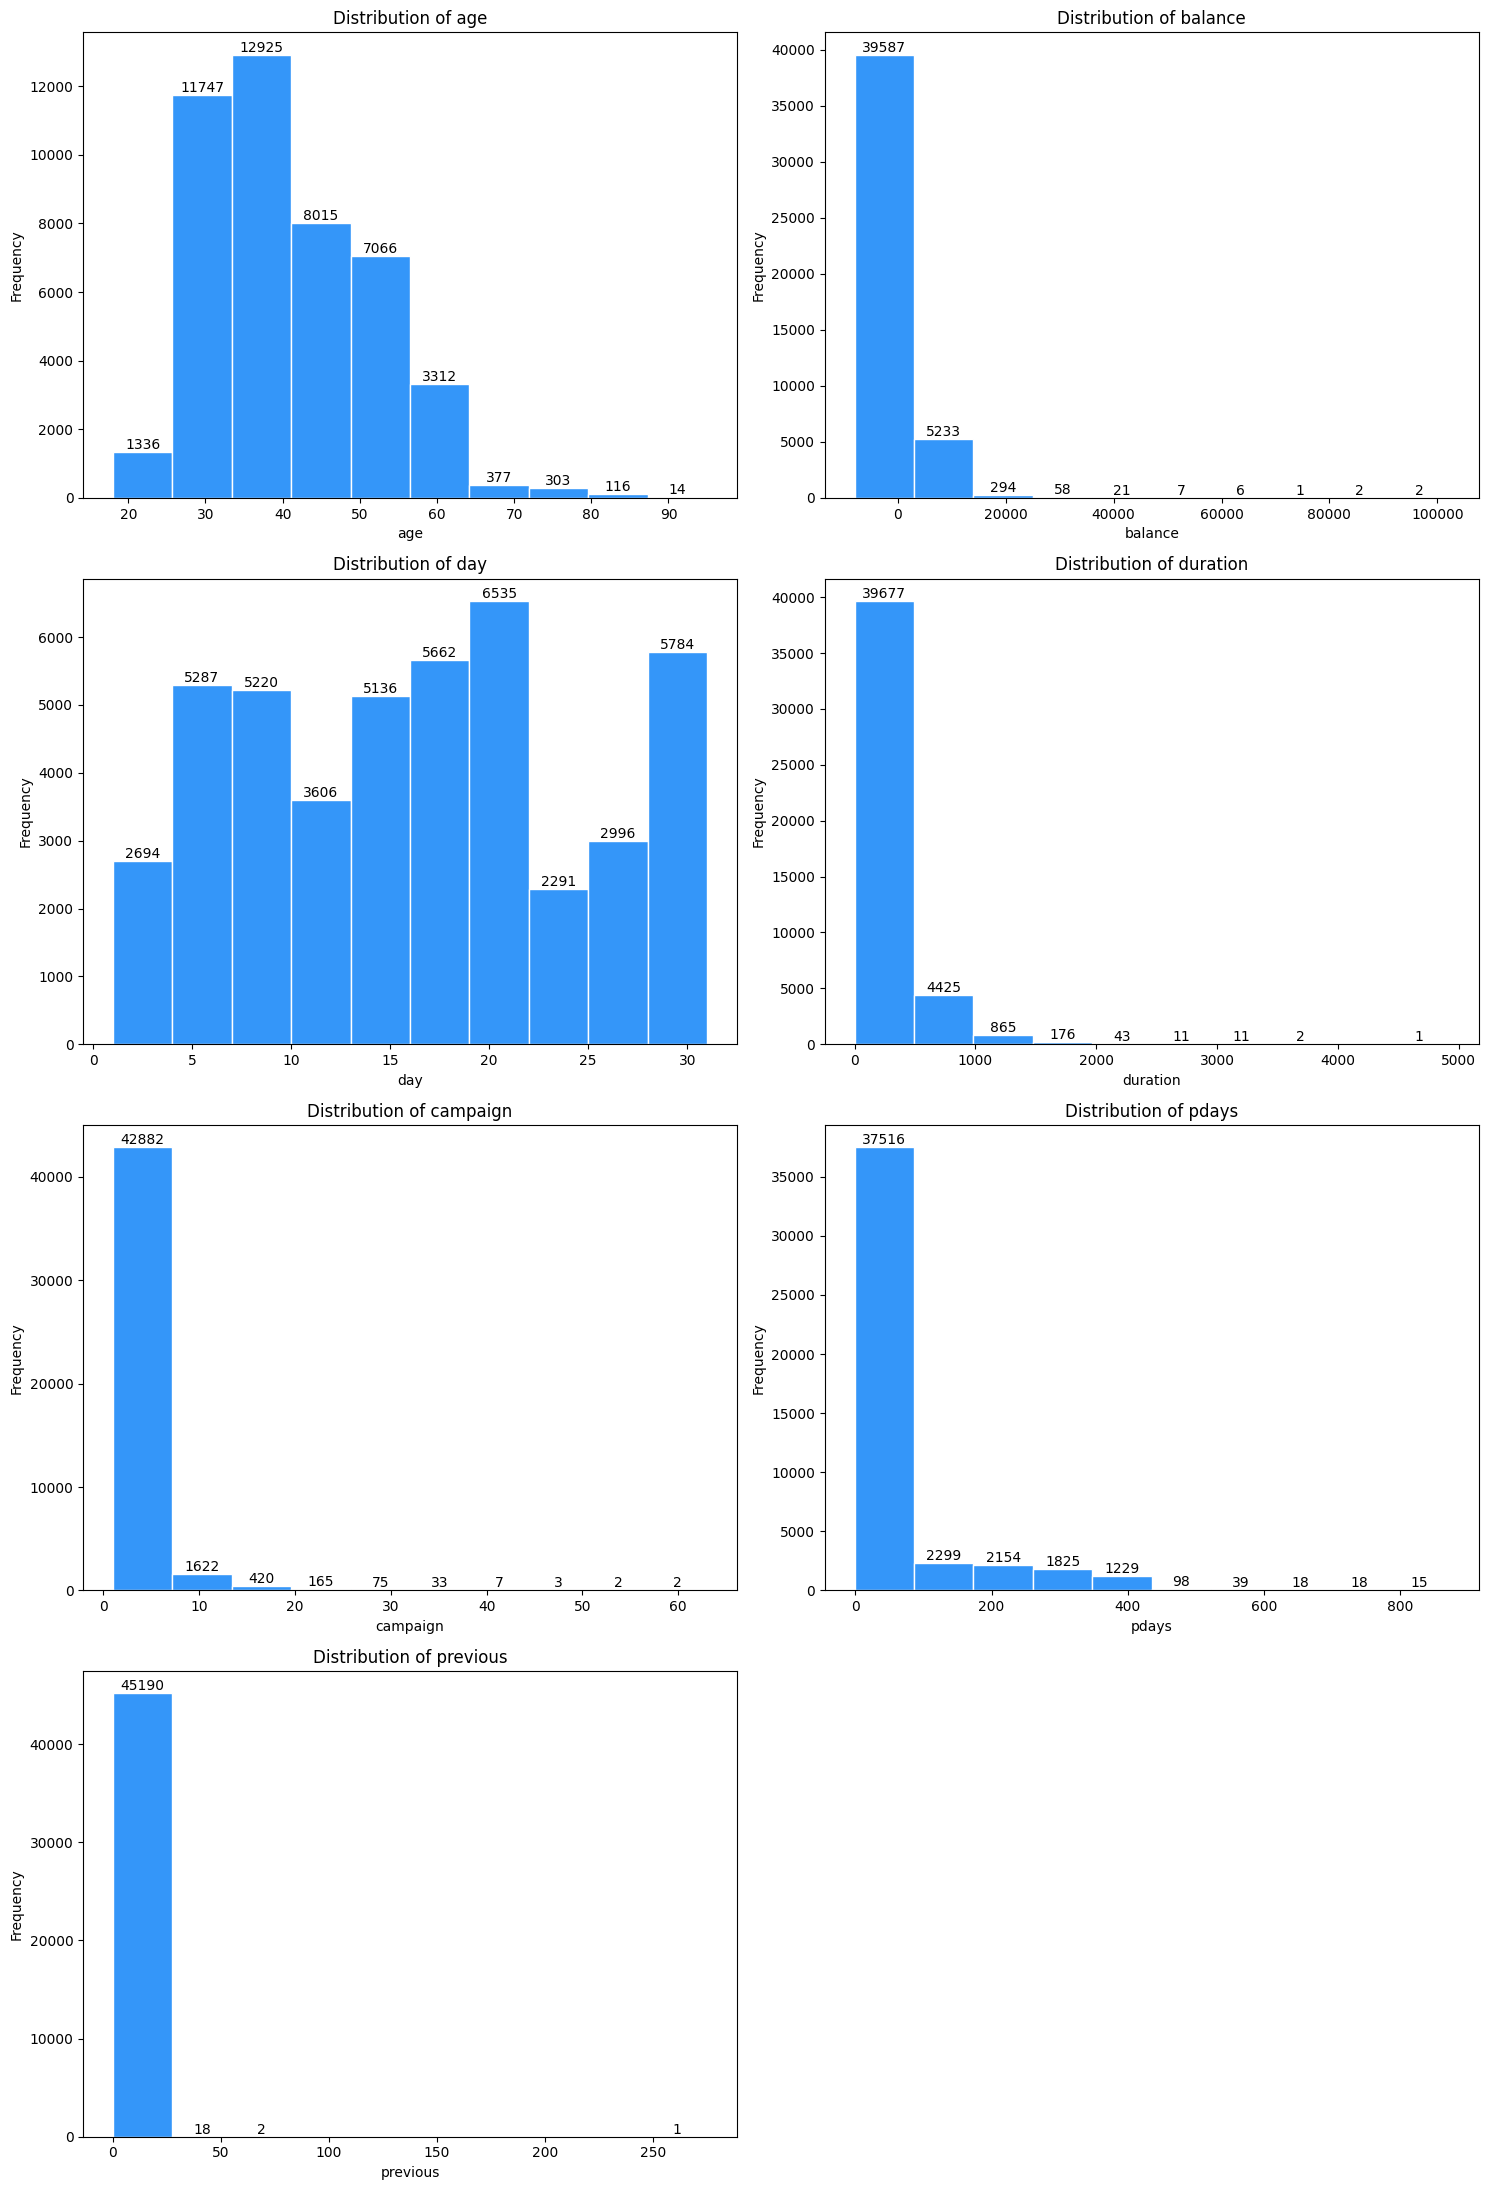

In [14]:
plt.figure(figsize=(15, 22))

for i, cols in enumerate(num_cols):
    plt.subplot(4, 2, i+1)
    counts, bins, patches = plt.hist(df[cols], bins=10, color='#3496f9', edgecolor='white')
    plt.title(f"Distribution of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Frequency")

    # Add text annotation for frequencies
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=10, ha='center', va='bottom', rotation=0)

plt.tight_layout()
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* `age: ` اکثر مشتری های بانک دارای رنج سنی بین 30 الی 40 سال را تشکیل می‌دهند و مابقی مشتری‌ها بین افراد سن بالای در رده دوم قرار دارند که رنج سنی 40 الی 60 را تشکیل میدهند.

* `balance: ` میانگین حساب سالانه اکثریت مشتری ها بین صفر الی 20000 است.

* `day: ` به صورت نسبی در تمامی روزها با مشتریان تماس گرفته شده. در روزهای پایانی ماه تماس‌ها کمتر بوده.

* `duration: ` مدت زمان تماس گرفته شده با مشتری ها کمتر از 15 دقیقه بوده است.

* `campaign: ` اکثریت در تماس‌های ابتدایی وارد کمپین شدند.

* `pdays: ` با نگاهی به نمودار  pdays، می‌توان نتیجه گرفت که اکثر مشتریان برای اولین بار با آنها تماس گرفته شده‌اند، زیرا طبق توضیحات ویژگی برای pdays، مقدار -1 نشان می‌دهد که قبلاً با مشتری تماس گرفته نشده است.

* `previous: ` تعداد مخاطبین انجام شده قبل از این کمپین و برای این مشتری

* از آنجایی که pday  و previous عمدتاً فقط از یک مقدار تشکیل شده اند، واریانس آنها بسیار کمتر است و از این رو می توانیم آنها را حذف کنیم زیرا از نظر فنی هیچ کمکی در پیش بینی نخواهد بود.

* بیشتر نمودارها نمایش داده شده نشان میدهند که دم نمودار سمت راست و چولگی مثبت می‌باشد و همینطور قله نمودارها بیانگر تکرار یا مود یک عدد که هر چه بیشتر فاصله بگیریم از قله تعداد تکرار با شدت و شیب زیادی کمتر می‌شود.به طور کلی نمودارها نشان می‌دهند که داده پرت وجود دارد.




</div>

In [15]:
df.drop(columns=['pdays', 'previous'], inplace=True)
num_cols =df.select_dtypes(include=["int64"] ).columns

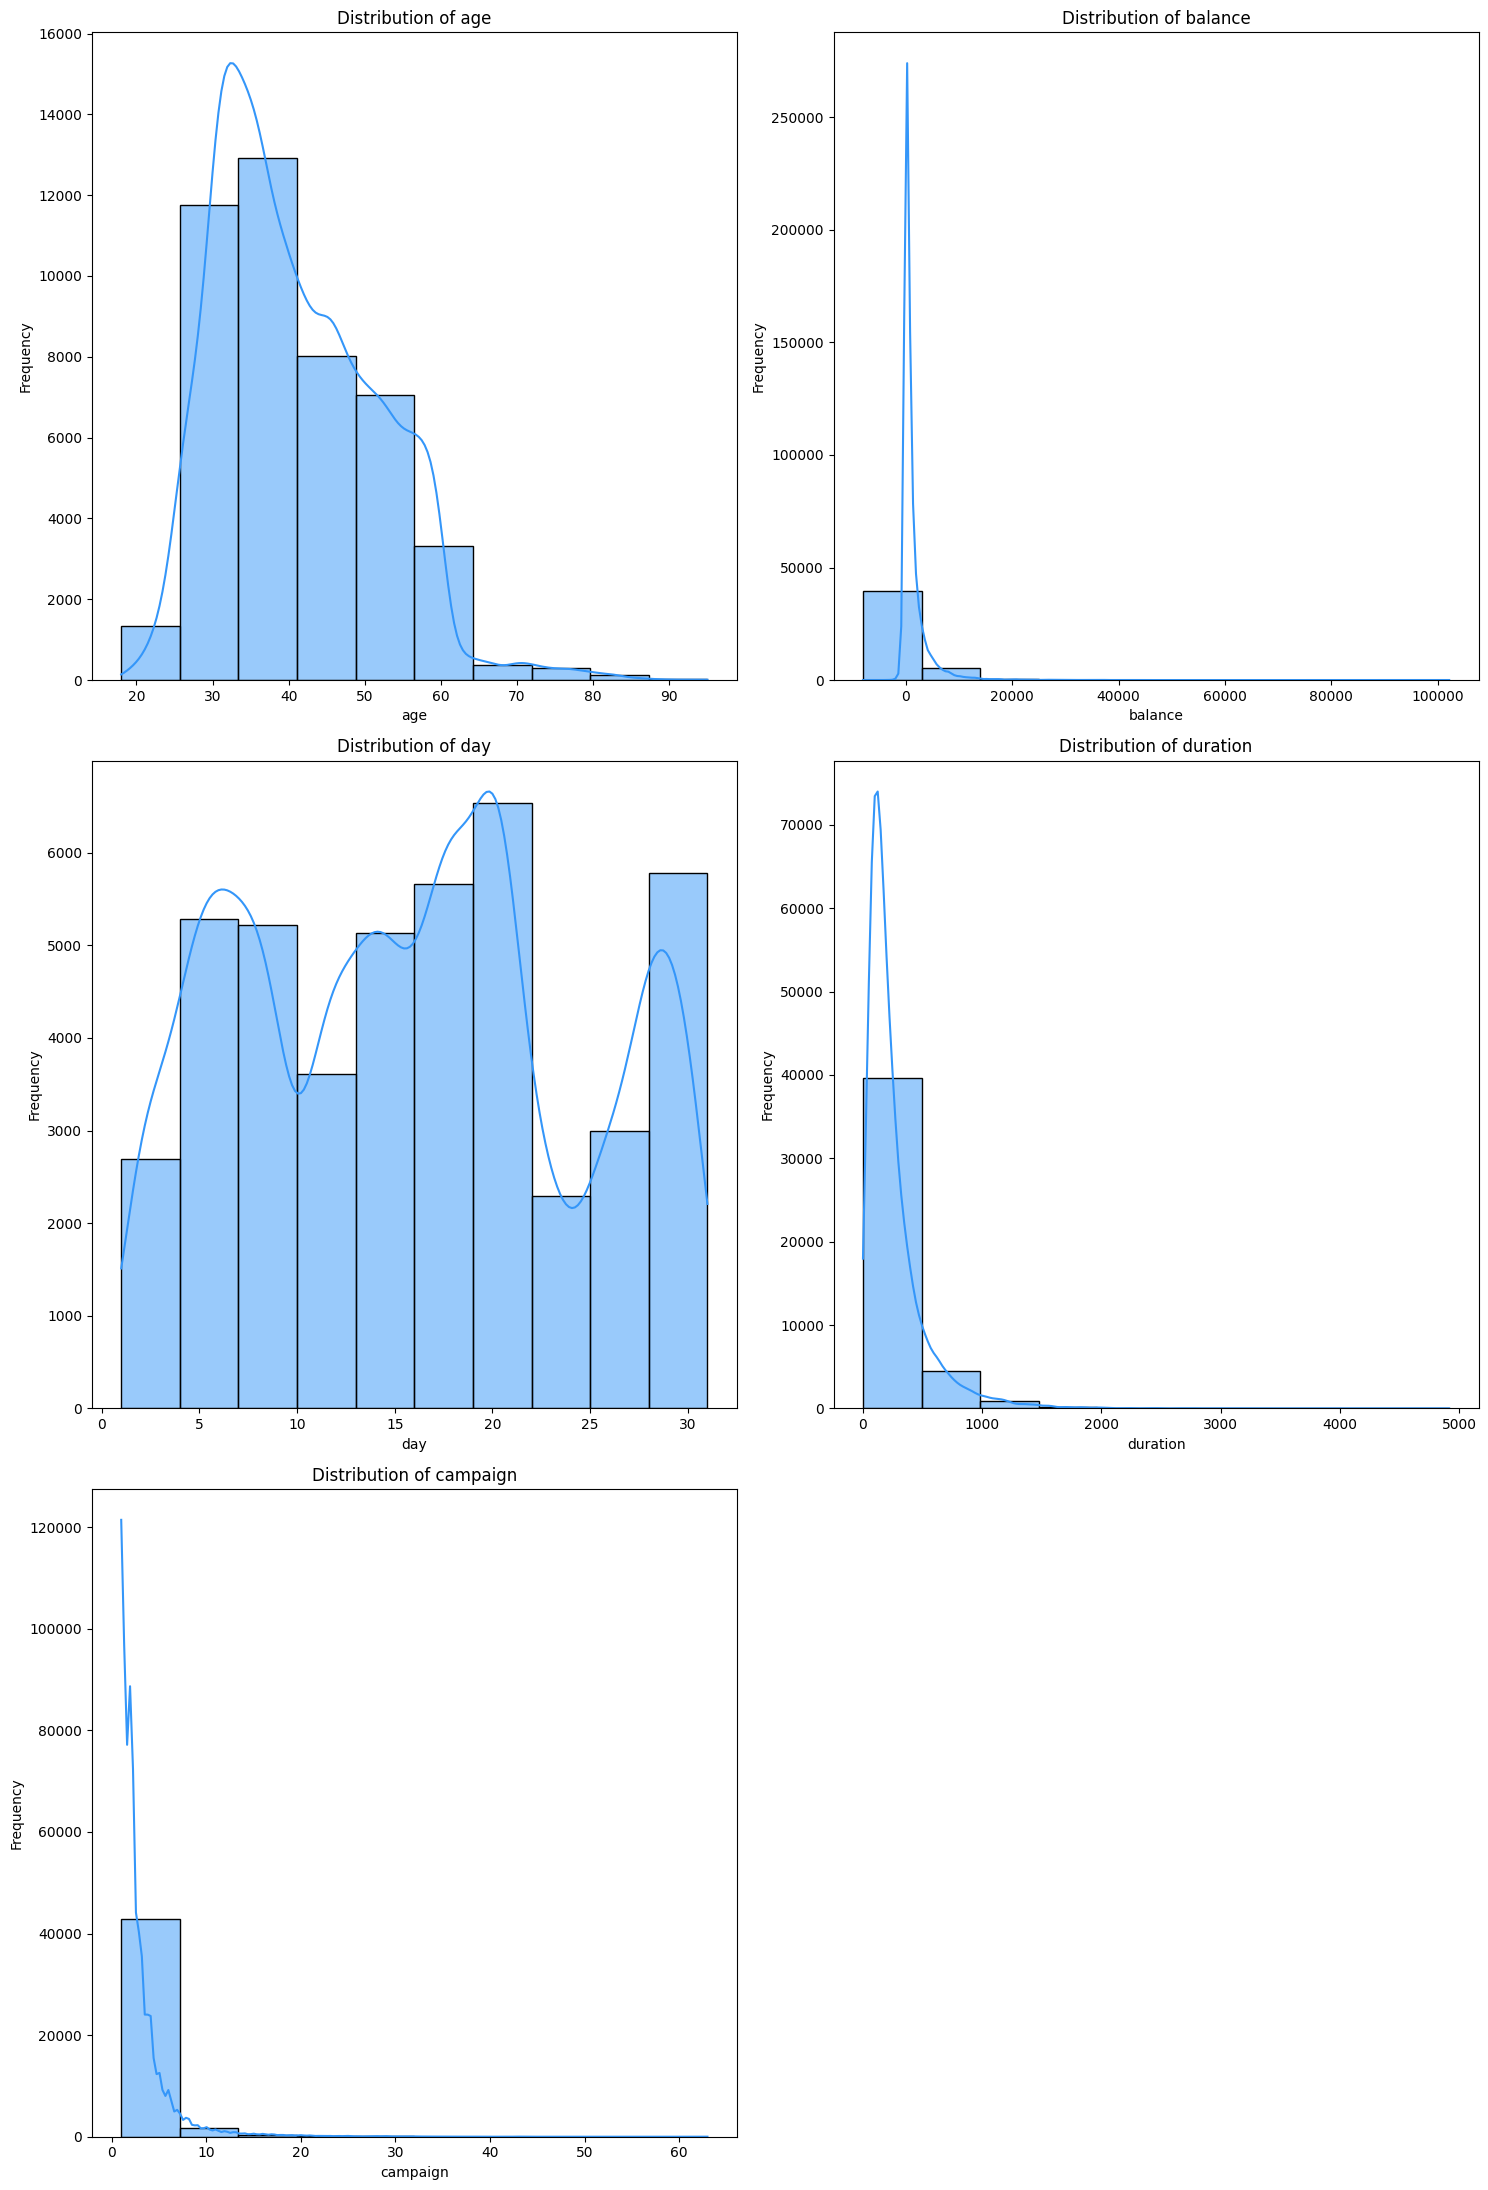

In [16]:
plt.figure(figsize=(15, 22))

for i, cols in enumerate(num_cols):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[cols], kde=True, bins=10, color='#3496f9')
    plt.title(f"Distribution of {cols}")
    plt.xlabel(cols)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

______

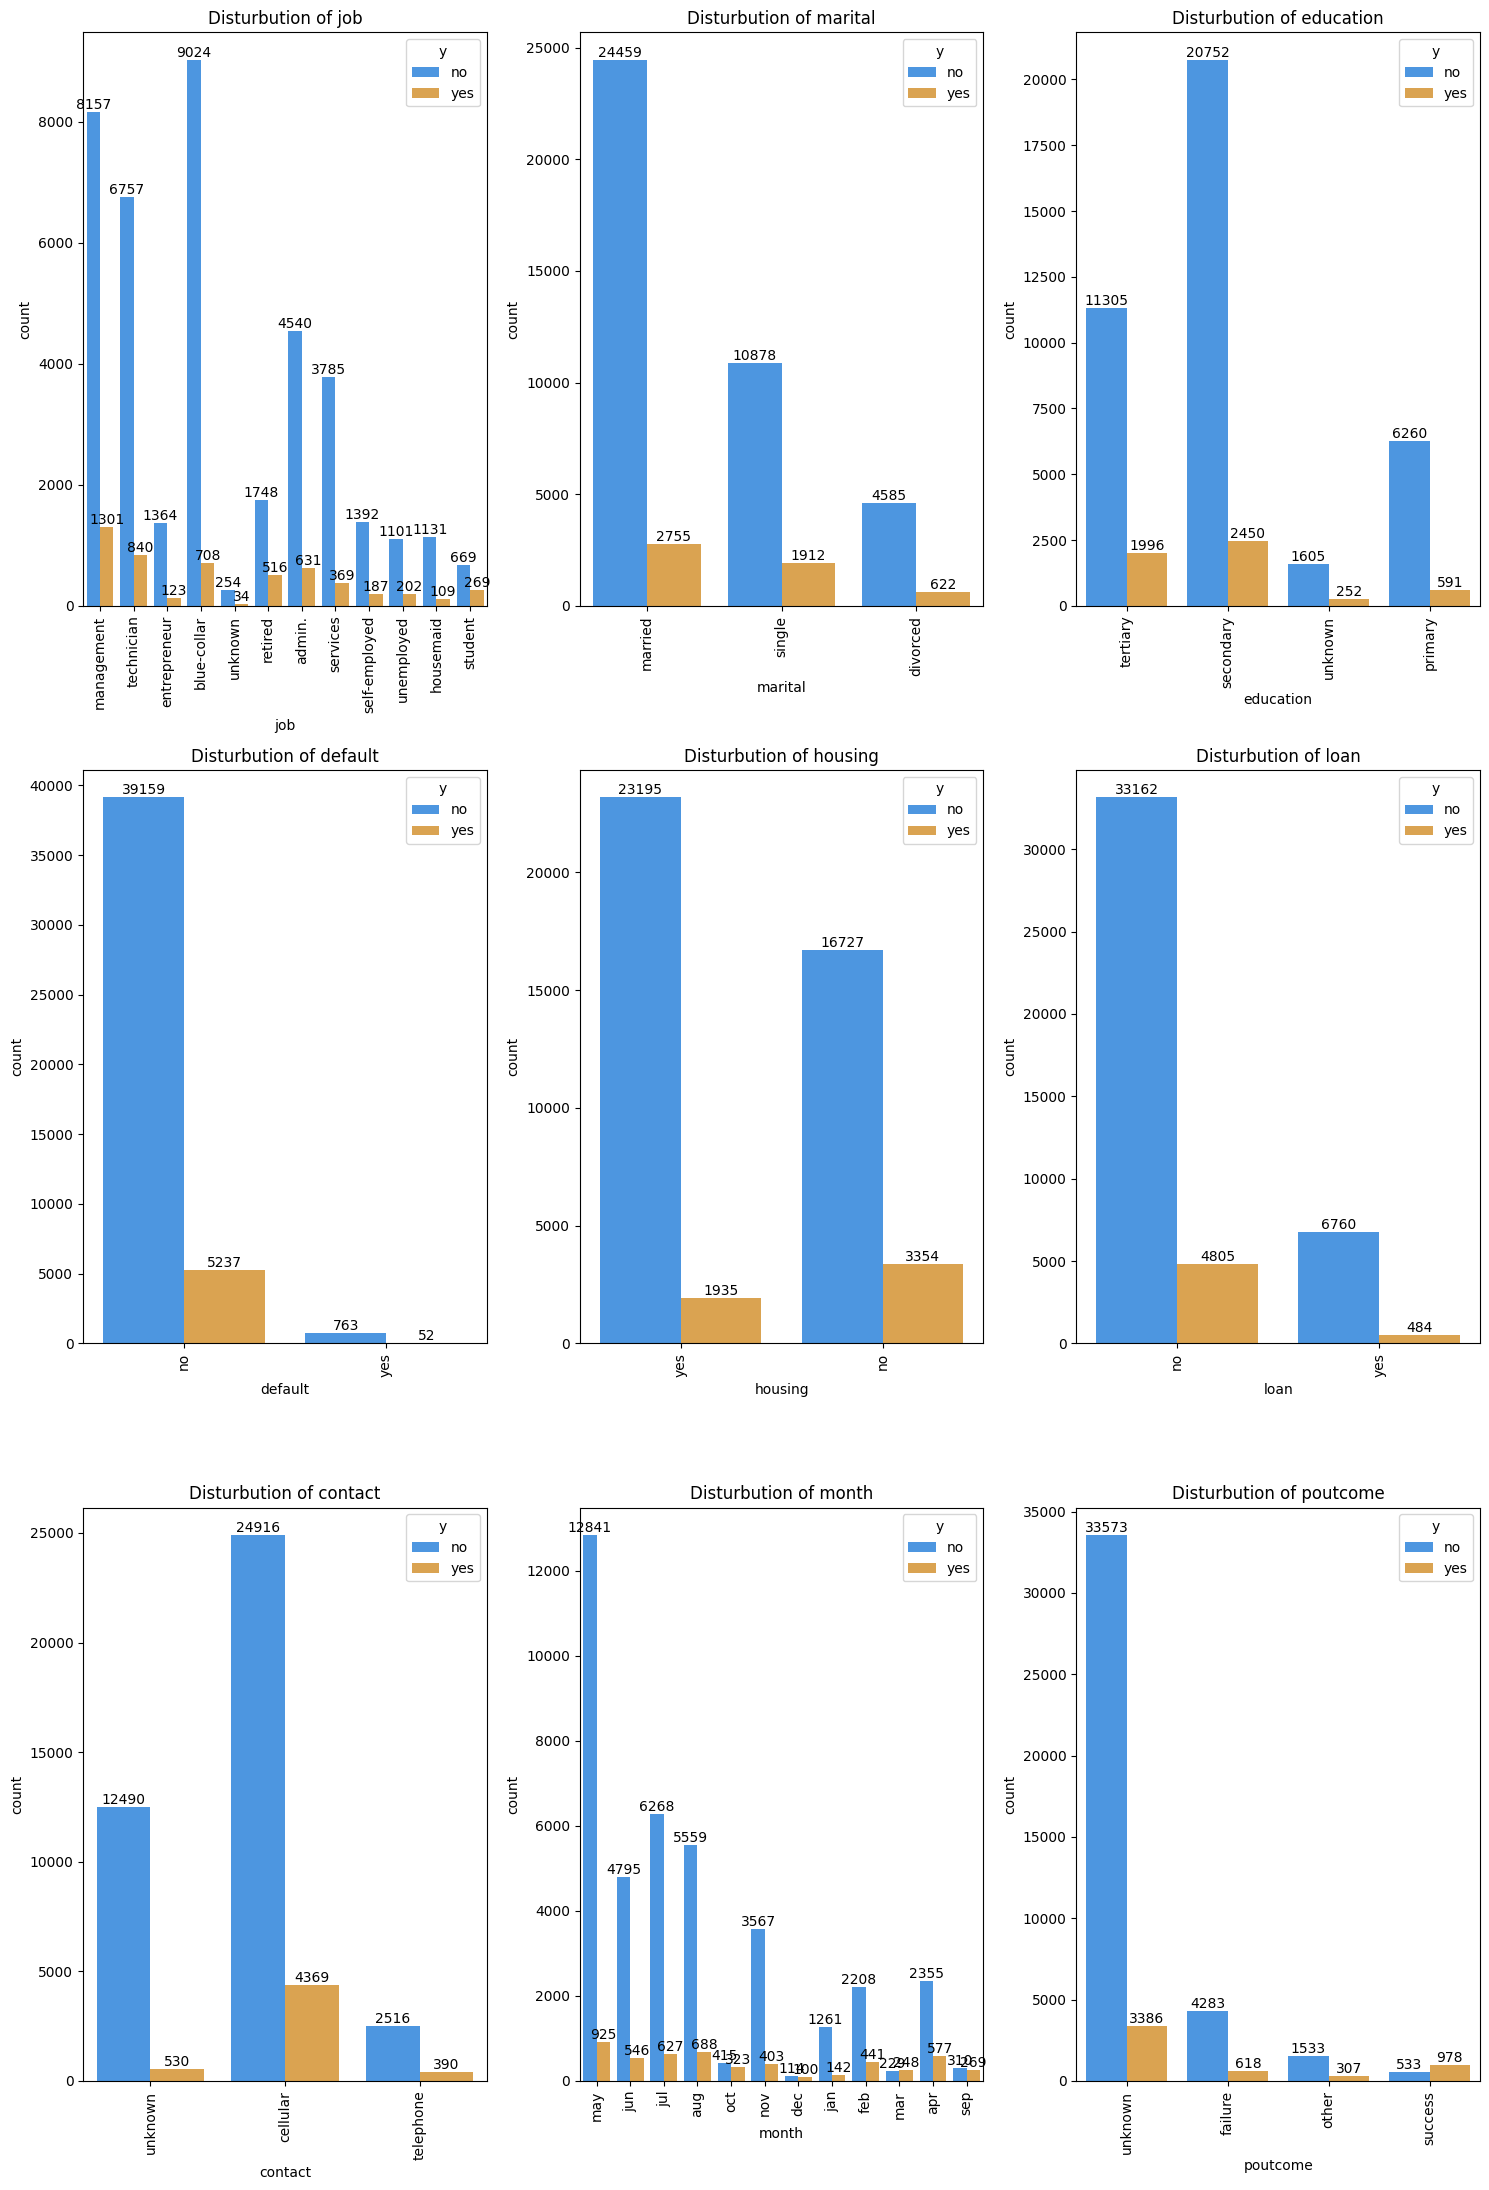

In [17]:
plt.figure(figsize=(15,22))
for i, cols in enumerate(cat_cols):
  plt.subplot(3 ,3, i+1)
  ax=sns.countplot(df, x=cols, hue="y", palette=["#3496f9", "#f1a73a"])
  for bars in ax.containers:
    ax.bar_label(bars)
  plt.title(f"Disturbution of {cols}")
  plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

* `job: ` مشتریانی که دارای شغل management و technician هستند نسبت به پرداخت وام عملکرد بهتری داشتند. 

* `marital: ` بیشترین باز پرداختی مربوط به مشتریانی هست که متاهلن اما به نسبت درصد مشتریانی که شرکت داشتند و وام را پرداخت کردند مشتریان مجرد بهتر بودند.

* `education: ` به نسبت مشتریان تحصیل کرده عملکرد بهتری داشتند.

* `default، housing ، loan: ` بیشتر مشتری‌های بانک به صورت پیش فرض هیچ اعتبار قبلی در حساب خود، وام مسکن و وام شخصی  نداشتند عملکرد بهتری در بازپرداخت وام داشتند.

* `contact: ` به نظر می رسد با مشتریانی که با تلفن های همراه ارتباط داشتند بیشتر پرداخت کردند اما به صورت درصدی نسبت به مشتریان موجود ارتباط با تلفن‌های همراه یا معمولی تفاوتی وجود ندارد تنها 2 درصد از تلفن‌های همراه بیشتر بوده است. .

* `month: ` بیشترین بازپرداختی در ماه may بوده طبیعتا تعداد بیشتری از مشتریان هم در ماه may نسبت به مابقی ماه‌های دیگه بوده است. اما به صورت درصدی در ماه‌های oct, dec, mar و sep بهتر بوده است.

* `poutcome: ` نتیجه کمپین قبلی نامشخص است.

* از آنجایی که poutcome و month عمدتاً نتیجه آن نامشخص است، از این رو می توانیم آنها را حذف کنیم زیرا از نظر فنی هیچ کمکی در پیش بینی نخواهد بود.

</div>

In [17]:
df.drop(columns=['poutcome', 'month'], inplace=True)
cat_cols = df.select_dtypes(include="object").columns.to_list()
cat_cols.remove('y')

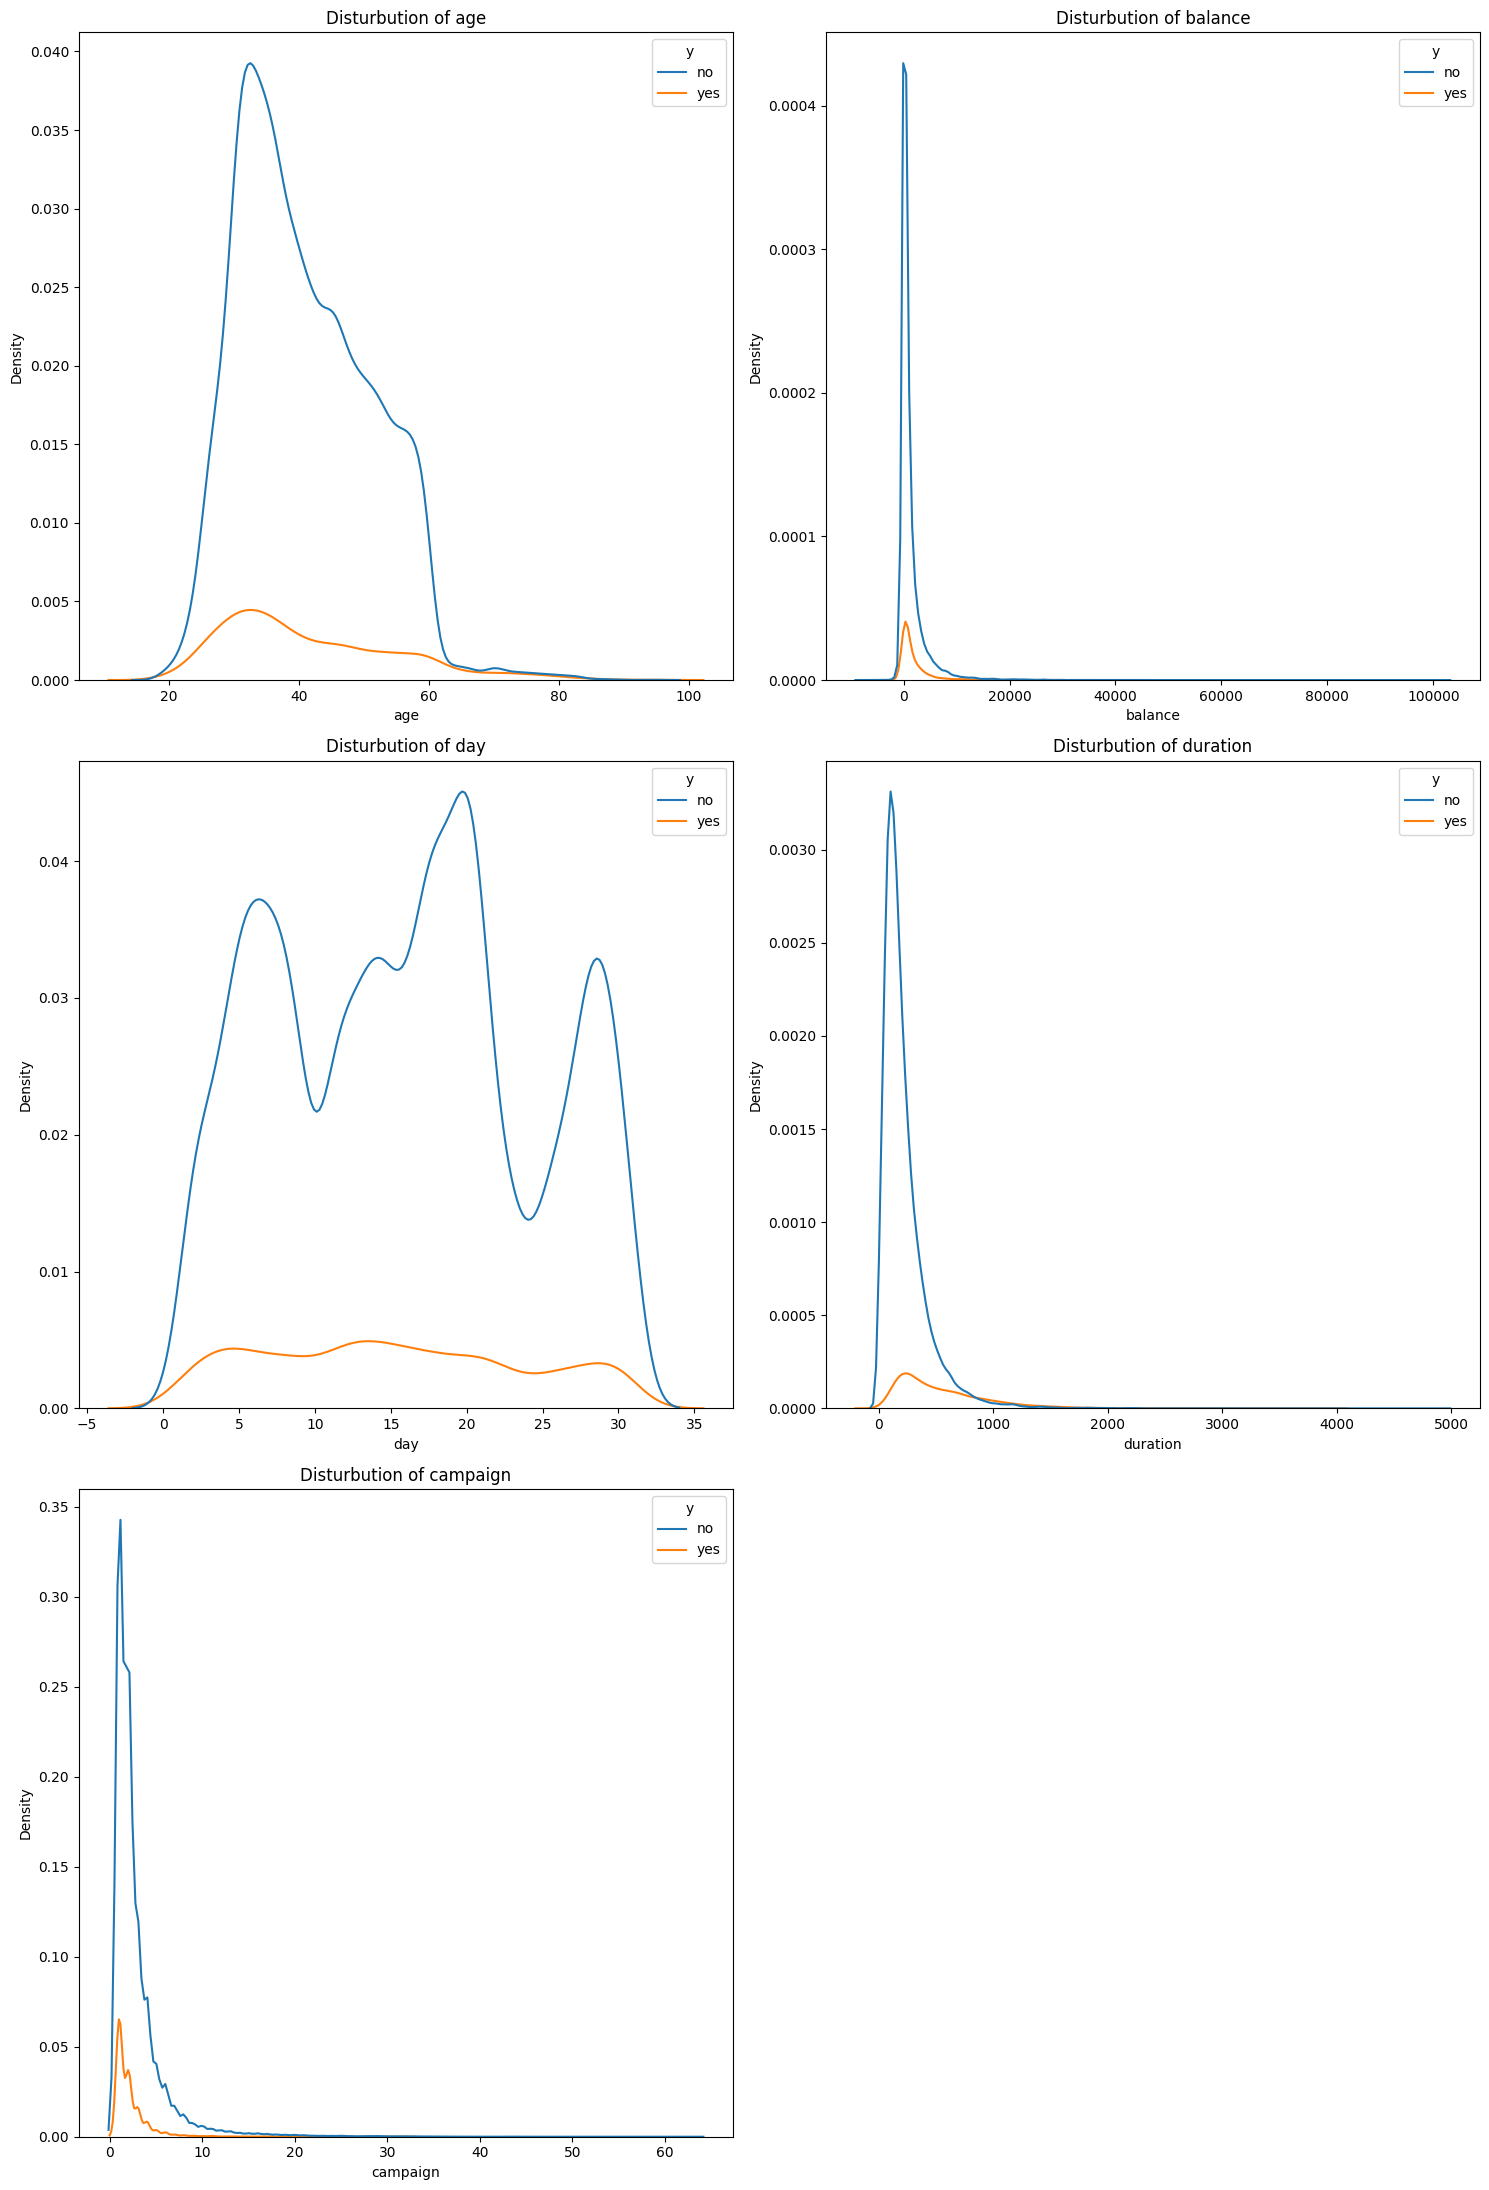

In [18]:
plt.figure(figsize=(15,22))
for i, cols in enumerate(num_cols):
  plt.subplot(3, 2, i+1)
  sns.kdeplot(df, x=cols, hue="y", color=["#3496f9", "#f1a73a"])
  plt.title(f"Disturbution of {cols}")
plt.tight_layout()
plt.show()

In [20]:
df[['age', 'balance', 'day', 'duration', 'campaign']].corr()

,age,balance,day,duration,campaign
age,1.000000,0.097783,-0.009120,-0.004648,0.004760
balance,0.097783,1.000000,0.004503,0.021560,-0.014578
day,-0.009120,0.004503,1.000000,-0.030206,0.162490
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000



<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  از ماتریس همبستگی می‌توان مشاهده کرد که هیچ نوع رابطه قوی بین ویژگی ها وجود ندارد.
</div>

# <h1 dir='rtl' style= "margin-right: 20px ; color:#3496f9">5) رسیدگی به داده‌های پرت</h1>

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  داده پرت یا دورافتاده به آن دسته از داده‌ها گفته می‌شود، که فاصله زیادی با دیگر داده‌های تحقیق داشته‌باشد، در اصل Outlier مقادیری است که نسبت به میانگین کل داده‌ها فاصله زیادی دارد. داده‌های دور افتاده می‌تواند نتایج بدست آمده را دچار اشکال کند. ترسیم نمودار جعبه‌ای می‌تواند کمک نماید که آیا داده‌های پرت وجود دارد یا خیر؟

</div>

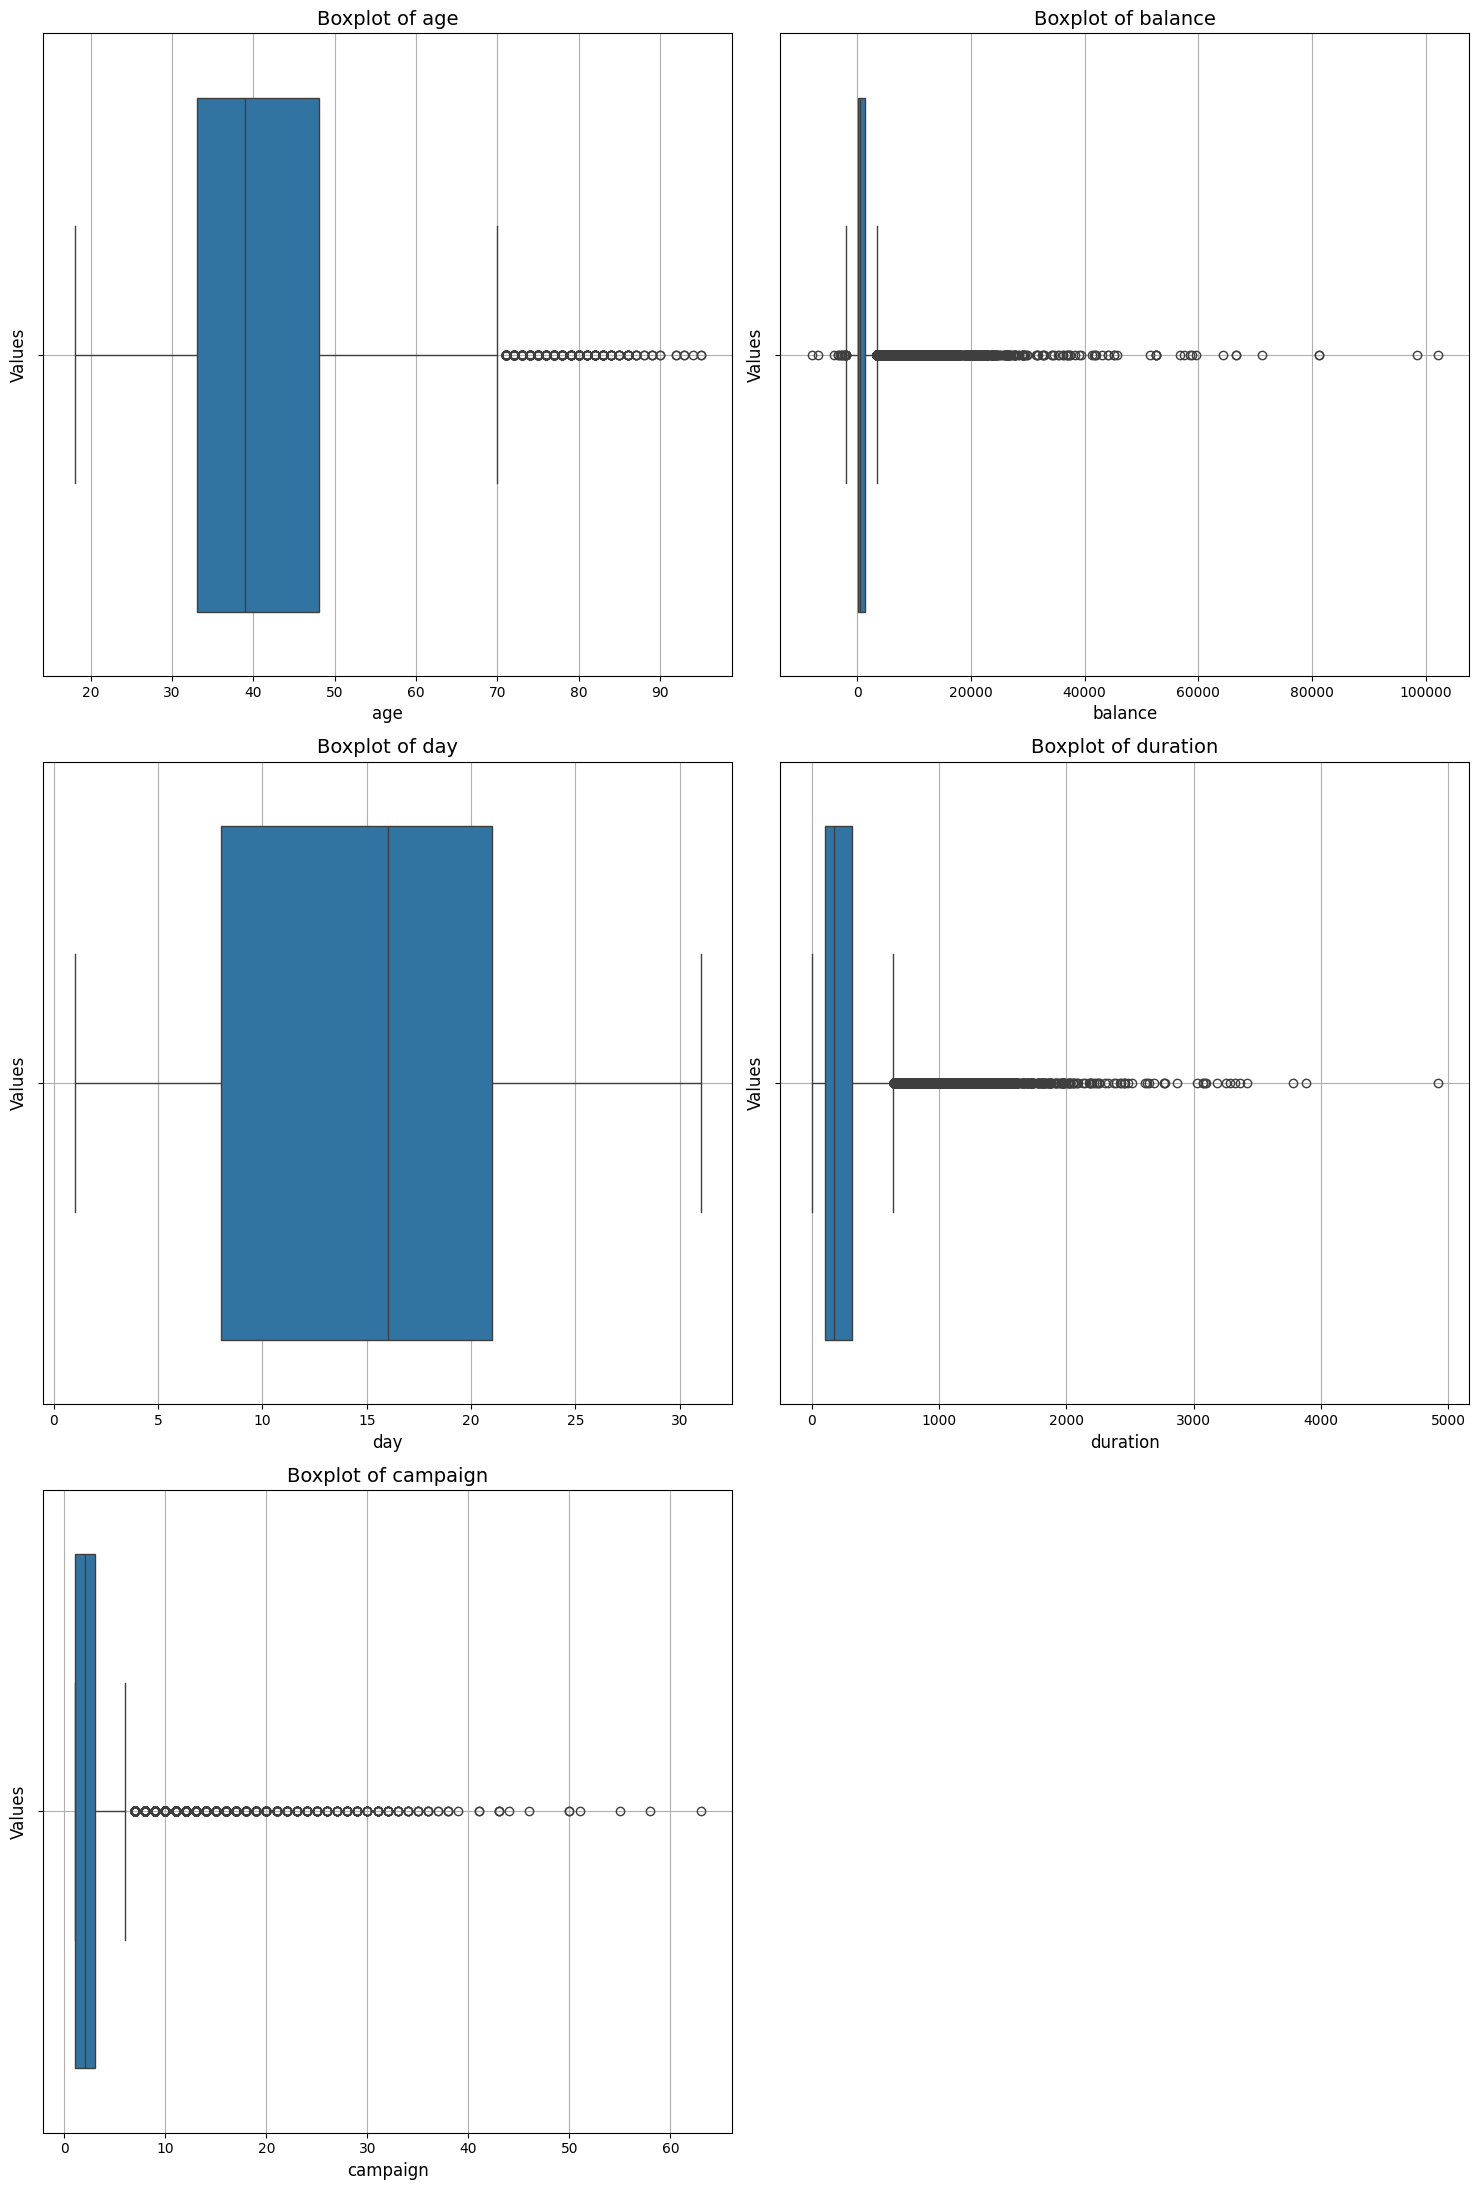

In [19]:
# num_cols =df.select_dtypes(include=["int64"] ).columns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 22))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(True)

plt.tight_layout()
axes[-1].axis("off")

# Show the plots
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  اکنون سعی می کنیم نقاط پرت را حذف کنیم و نحوه عملکرد مدل را دریابیم.



</div>

In [20]:
# outlier data
def find_outliers_IQR(df):

   q1=df.quantile(0.25)

   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

In [21]:
# outlier data
outlier_detection = df[num_cols]
for k, v in outlier_detection.items():
        outliers = find_outliers_IQR(v)
        perc = len(find_outliers_IQR(v)) * 100.0 / np.shape(outlier_detection)[0]
        print(f'Column :{k}')
        print(f"Number of Outliers = {len(outliers)}","||",f"Max Outlier Value = {outliers.max()}",
              "||", f"Min Outlier Value = {outliers.min()}", "||", f"Percentage of Outliers = {perc:.2f}%")
        print("\n")

Column :age
Number of Outliers = 487 || Max Outlier Value = 95 || Min Outlier Value = 71 || Percentage of Outliers = 1.08%


Column :balance
Number of Outliers = 4729 || Max Outlier Value = 102127 || Min Outlier Value = -8019 || Percentage of Outliers = 10.46%


Column :day
Number of Outliers = 0 || Max Outlier Value = nan || Min Outlier Value = nan || Percentage of Outliers = 0.00%


Column :duration
Number of Outliers = 3235 || Max Outlier Value = 4918 || Min Outlier Value = 644 || Percentage of Outliers = 7.16%


Column :campaign
Number of Outliers = 3064 || Max Outlier Value = 63 || Min Outlier Value = 7 || Percentage of Outliers = 6.78%




In [22]:
# columns = ['age','balance', 'day', 'duration', 'campaign']

for col in num_cols:
    precentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR = percentile75 - precentile25
    print("Column:", col)

    # Finding the outliers using the formula 1.5*IQR
    Upper_limit = percentile75 + (1.5 * IQR)
    Lower_limit = precentile25 - (1.5 * IQR)

    Upper_limit_len = df[(df[col] > Upper_limit)]

    Outlier_detect = df[(df[col] < Lower_limit) | (df[col] > Upper_limit)]

    print('Number of Rows in Training Set: ',len(df))
    df= df.drop(Outlier_detect.index)
    print('After removing outliers, Number of Rows in Training Set: ',len(df))
    print("---"*30)

Column: age
Number of Rows in Training Set:  45211
After removing outliers, Number of Rows in Training Set:  44724
------------------------------------------------------------------------------------------
Column: balance
Number of Rows in Training Set:  44724
After removing outliers, Number of Rows in Training Set:  40028
------------------------------------------------------------------------------------------
Column: day
Number of Rows in Training Set:  40028
After removing outliers, Number of Rows in Training Set:  40028
------------------------------------------------------------------------------------------
Column: duration
Number of Rows in Training Set:  40028
After removing outliers, Number of Rows in Training Set:  37150
------------------------------------------------------------------------------------------
Column: campaign
Number of Rows in Training Set:  37150
After removing outliers, Number of Rows in Training Set:  34563
-----------------------------------------------

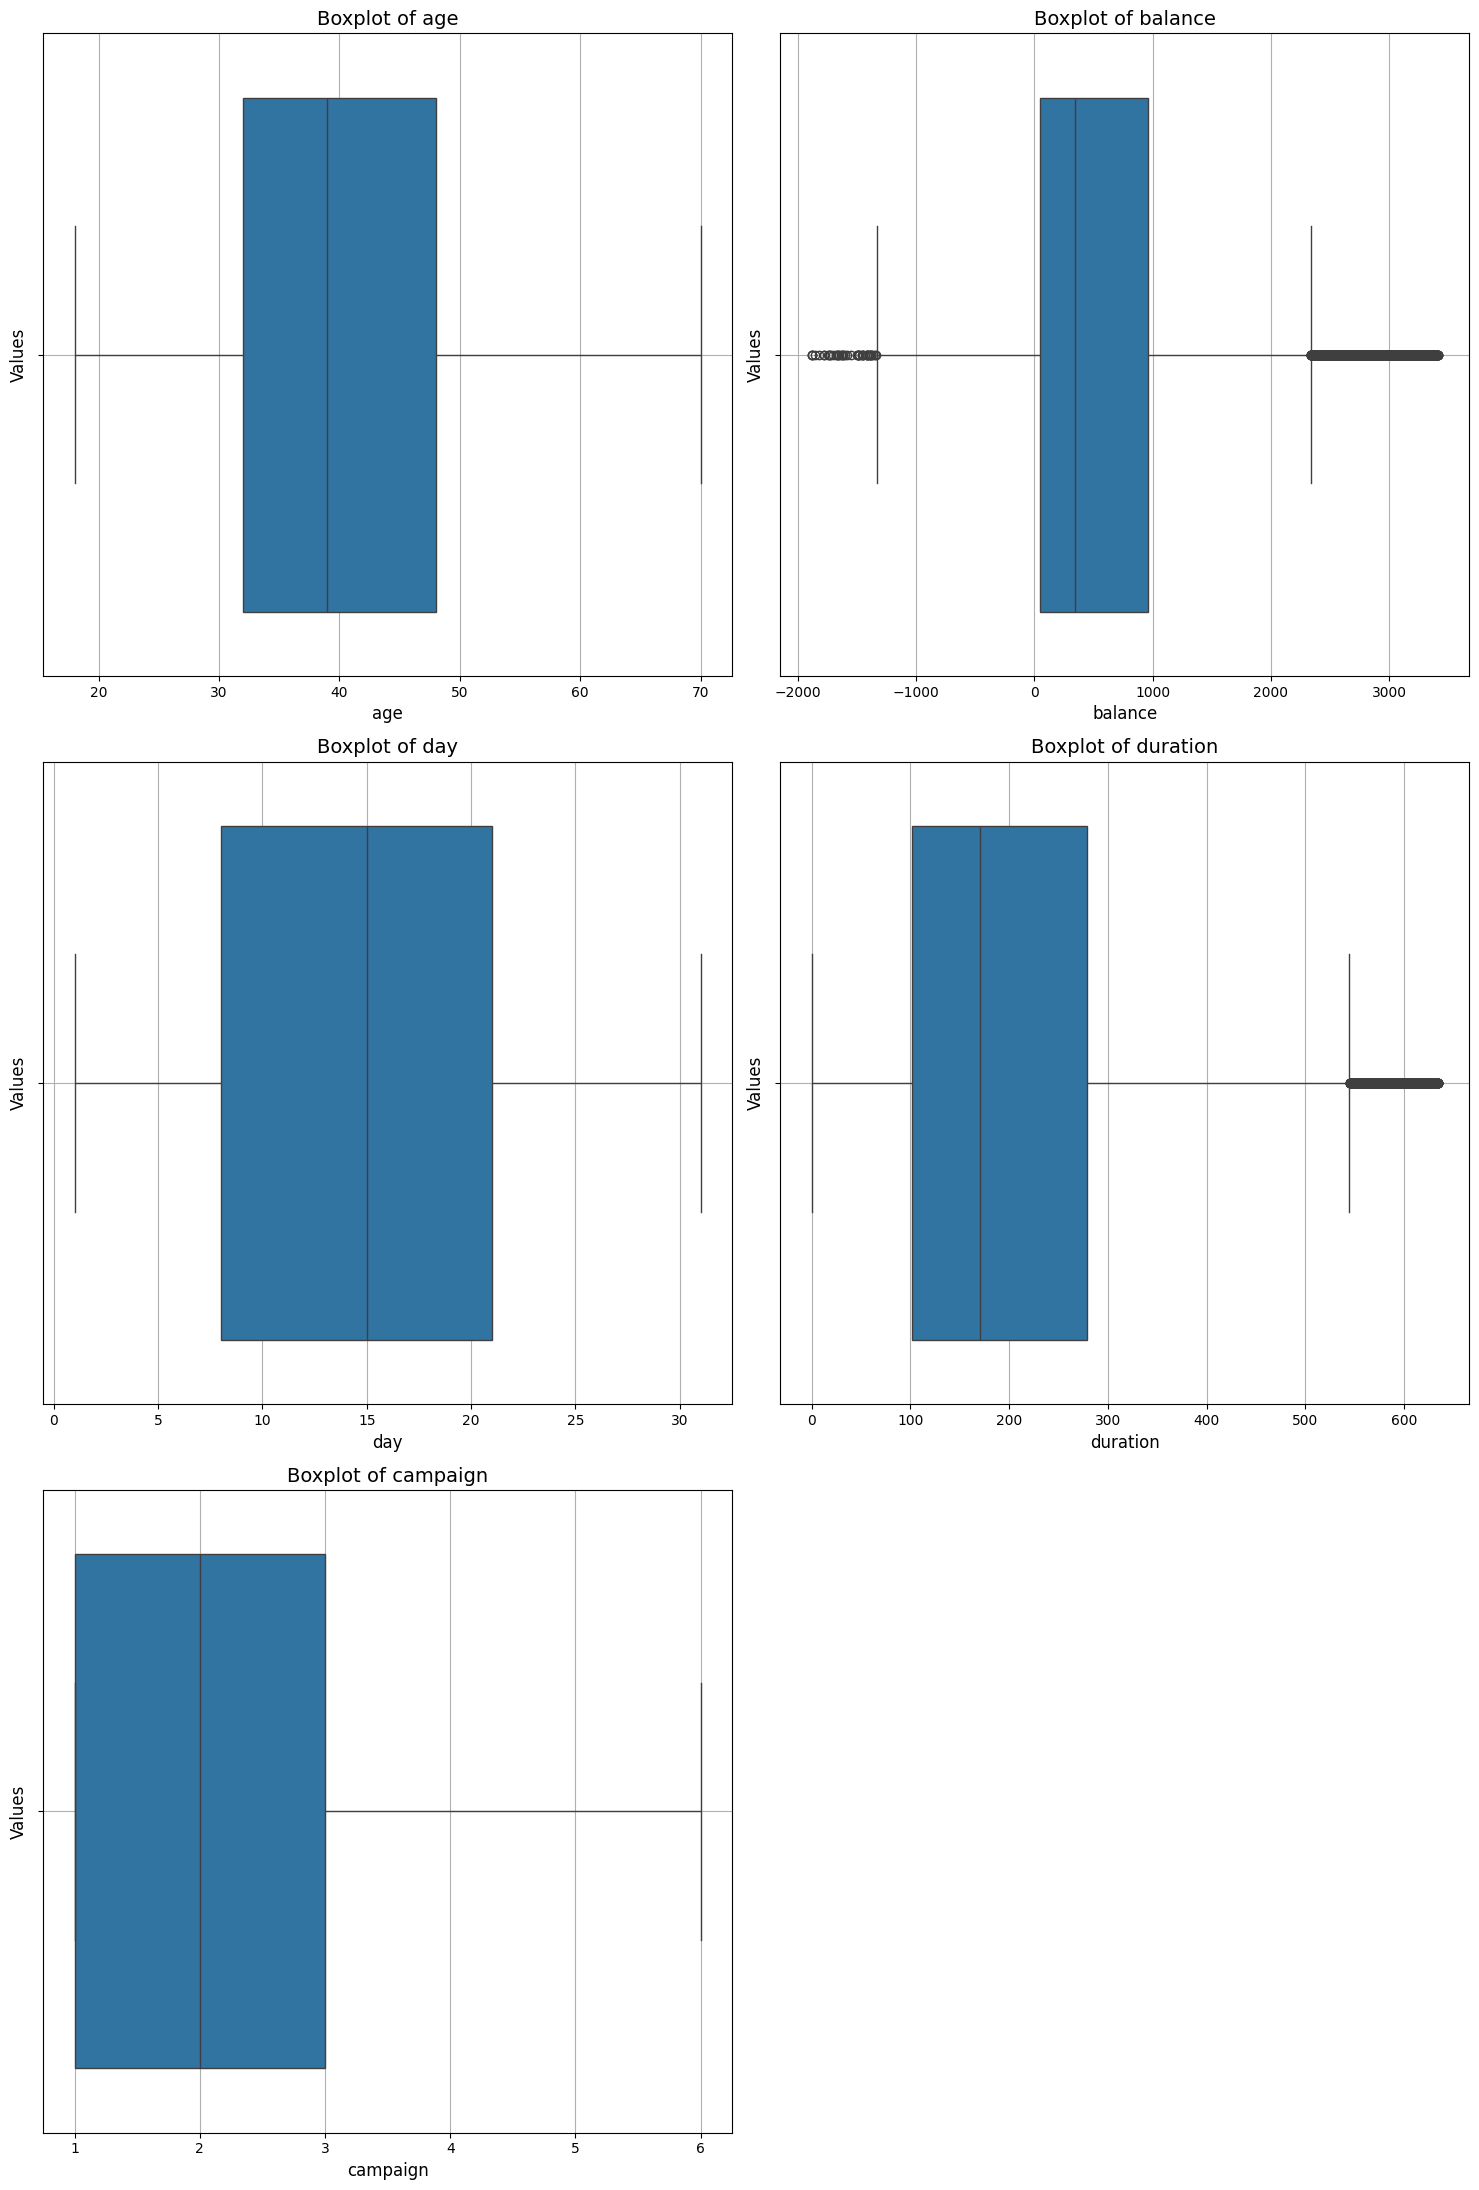

In [23]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 22))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Values", fontsize=12)
    axes[i].tick_params(axis='both', labelsize=10)
    axes[i].grid(True)

plt.tight_layout()
axes[-1].axis("off")

# Show the plots
plt.show()

<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  همانطور که مشاهده میشود به نسبت داده های پرت حذف شدند.

</div>

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
classification_models = {
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

In [30]:
X = df.drop(columns=['y'])
y = df['y']

numerical_cols = X.select_dtypes(include=['int', 'float']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [31]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

best_accuracy = 0
best_model = None

for model_name, model in classification_models.items():
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

    pipe.fit(X_train, y_train)

    y_pred = pipe.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model     


    print(f"Model: {model_name}, Accuracy: {accuracy}")

print("\nBest Model:", best_model)
print("Best Model Accuracy:", best_accuracy)

Model: LogisticRegression, Accuracy: 0.9172573412411399
Model: SVM, Accuracy: 0.9187038912194416
Model: KNN, Accuracy: 0.913207001301895
Model: DecisionTree, Accuracy: 0.8831187617532186
Model: RandomForest, Accuracy: 0.9221756111673658

Best Model: RandomForestClassifier()
Best Model Accuracy: 0.9221756111673658


<div dir='rtl'  style= "font-size:110%; margin-right: 20px">

*  بهترین عملکرد مربوط به مدل random forest

</div>

In [32]:
cr = classification_report(y_pred, y_test)
print(cr)

              precision    recall  f1-score   support

          no       0.99      0.93      0.96      6744
         yes       0.17      0.56      0.26       169

    accuracy                           0.92      6913
   macro avg       0.58      0.75      0.61      6913
weighted avg       0.97      0.92      0.94      6913



Text(50.722222222222214, 0.5, 'Predicted')

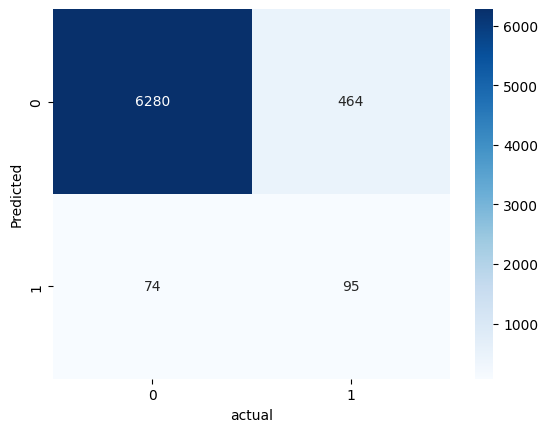

In [33]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True, fmt ='g', cmap = 'Blues')
plt.xlabel ('actual')
plt.ylabel ('Predicted')

______________
